In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# Carregar conjunto de dados
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Usar apenas a largura e comprimento da pétala
# X = iris.data[:, 0:2]  # Usar apenas a largura e comprimento da sépala
Y = iris.target
target_names = iris.target_names

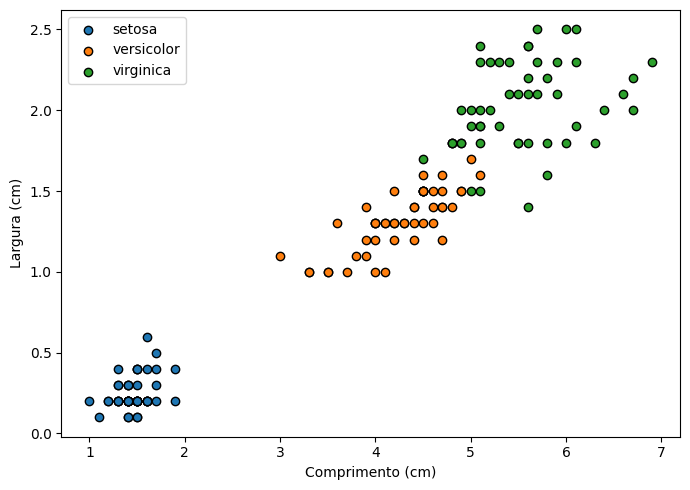

In [20]:
# Análise exploratória
plt.figure(figsize=(7, 5))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(
        X[Y == i, 0],
        X[Y == i, 1],
        label=target_name,
        edgecolor='k'
    )

plt.xlabel('Comprimento (cm)')
plt.ylabel('Largura (cm)')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# Normalização Z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelos SVM (classificação)
svm_linear = SVC(kernel='linear', C=1., random_state=42) # Kernel linear
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42) # Kernel não linear (RBF)

In [22]:
# Treinamento
svm_linear.fit(X_scaled, Y)
svm_rbf.fit(X_scaled, Y)

# Predição
Y_pred_linear = svm_linear.predict(X_scaled)
Y_pred_rbf = svm_rbf.predict(X_scaled)

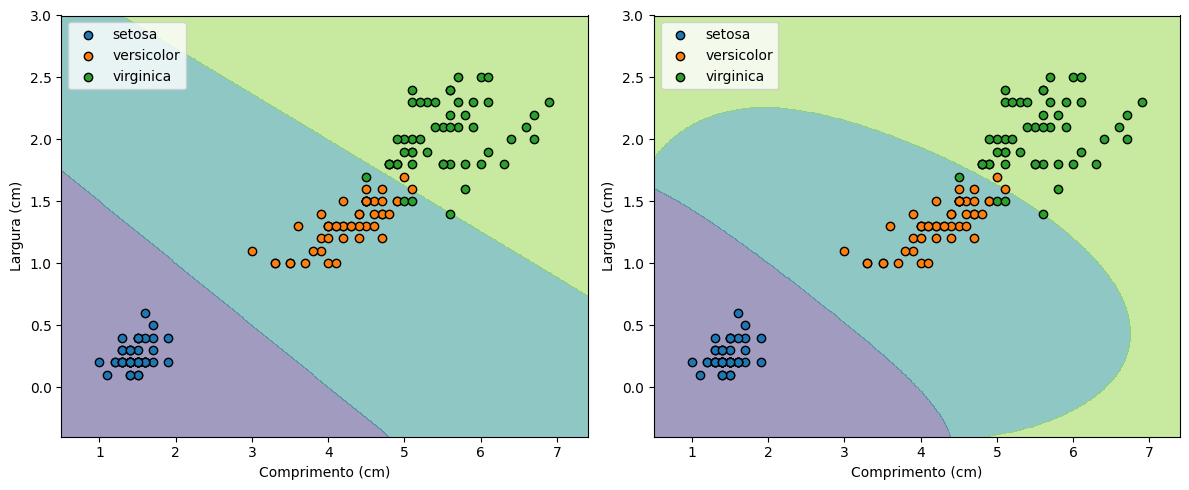

In [23]:
# Resultados e superfície de decisão
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

grid_scaled = scaler.transform(np.c_[XX.ravel(), YY.ravel()])

linear = svm_linear.predict(grid_scaled).reshape(XX.shape)
rbf = svm_rbf.predict(grid_scaled).reshape(XX.shape)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
titles = ['Linear', 'RBF']
Zs = [linear, rbf]

for ax, title, Z in zip(axes, titles, Zs):
    ax.contourf(XX, YY, Z, alpha=0.5, levels=np.arange(-0.5, 3, 1))
    for i, target_name in enumerate(target_names):
        ax.scatter(
            X[Y == i, 0],
            X[Y == i, 1],
            label=target_name,
            edgecolor='k'
        )
    ax.set_xlabel('Comprimento (cm)')
    ax.set_ylabel('Largura (cm)')
    ax.legend()

plt.tight_layout()
plt.show()

In [24]:
# Acurácia
ac_linear = accuracy_score(Y, Y_pred_linear)
ac_rbf = accuracy_score(Y, Y_pred_rbf)

print(f"Linear: {ac_linear:.3f}")
print(f"RBF: {ac_rbf:.3f}")

Linear: 0.953
RBF: 0.960
